# **Tarea 1**
*Integrantes:*


*   Castillo Saldivar Paola
*   Islas Castro Diego Armando
*   Maldonado Cruz Josué Iván    



# **Ejercicio 1.1**


In [ ]:
import numpy as np
import time

# Multiplicación por bloques
def multiplicacion_bloques(A, B, block_size):
    """Multiplica matrices A y B por bloques de tamaño block_size."""
    m, n = A.shape  # Dimensiones de la matriz A
    n_B, p = B.shape  # Dimensiones de la matriz B
    assert n == n_B, "El número de columnas de A debe ser igual al número de filas de B"

    C = np.zeros((m, p))  # Matriz resultado

    for i in range(0, m, block_size):  # Itera por bloques en filas de A
        for j in range(0, p, block_size):  # Itera por bloques en columnas de B
            for k in range(0, n, block_size):  # Itera por bloques internos
                C[i:i+block_size, j:j+block_size] += np.dot(A[i:i+block_size, k:k+block_size],
                                                             B[k:k+block_size, j:j+block_size])
    return C

# Multiplicación tradicional (La vista en clase, con algunos ajustes)
def MultMat(Mat1, Mat2):
    """Multiplica dos matrices usando el algoritmo tradicional."""
    Mat3 = np.zeros((Mat1.shape[0], Mat2.shape[1]))
    for row in range(Mat1.shape[0]):
        for col in range(Mat2.shape[1]):
            for aux in range(Mat2.shape[0]):
                Mat3[row, col] += Mat1[row, aux] * Mat2[aux, col]
    return Mat3

# Comparar tiempos de ejecución para diferentes tamaños de matrices
def comparar_multiplicaciones(n, block_size):
    # Generando matrices aleatorias
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)

    # Multiplicación tradicional y medición de tiempo
    start = time.time()
    C_normal = MultMat(A, B)
    time_normal = time.time() - start

    # Multiplicación por bloques y medición de tiempo
    start = time.time()
    C_blocks = multiplicacion_bloques(A, B, block_size)
    time_blocks = time.time() - start

    # Comparación de tiempos
    print(f"Tamaño de la matriz: {n}x{n}")
    print(f"Tiempo multiplicación normal: {time_normal:.6f} s")
    print(f"Tiempo multiplicación por bloques: {time_blocks:.6f} s")
    print(f"Mejor tiempo: {'Bloques' if time_blocks < time_normal else 'Normal'}\n")

# Ejecutar comparaciones para tamaños de matrices de 10 a 100
block_size = 10  # Tamaño de bloque
for n in range(10, 101, 10):
    comparar_multiplicaciones(n, block_size)


Tamaño de la matriz: 10x10
Tiempo multiplicación normal: 0.014285 s
Tiempo multiplicación por bloques: 0.007358 s
Mejor tiempo: Bloques

Tamaño de la matriz: 20x20
Tiempo multiplicación normal: 0.050849 s
Tiempo multiplicación por bloques: 0.000226 s
Mejor tiempo: Bloques

Tamaño de la matriz: 30x30
Tiempo multiplicación normal: 0.140437 s
Tiempo multiplicación por bloques: 0.002471 s
Mejor tiempo: Bloques

Tamaño de la matriz: 40x40
Tiempo multiplicación normal: 0.171287 s
Tiempo multiplicación por bloques: 0.011841 s
Mejor tiempo: Bloques

Tamaño de la matriz: 50x50
Tiempo multiplicación normal: 0.515901 s
Tiempo multiplicación por bloques: 0.009727 s
Mejor tiempo: Bloques

Tamaño de la matriz: 60x60
Tiempo multiplicación normal: 0.531399 s
Tiempo multiplicación por bloques: 0.006377 s
Mejor tiempo: Bloques

Tamaño de la matriz: 70x70
Tiempo multiplicación normal: 1.261977 s
Tiempo multiplicación por bloques: 0.025669 s
Mejor tiempo: Bloques

Tamaño de la matriz: 80x80
Tiempo multipl

# **Ejercicio 1.2**

In [ ]:
def suma_bloques(A, B, block_size):
    """Suma matrices A y B por bloques de tamaño block_size."""
    m, n = A.shape  # Dimensiones de la matriz A
    m_B, p = B.shape  # Dimensiones de la matriz B
    assert (m == m_B and n == p), "Las matrices deben tener las mismas dimensiones"

    C = np.zeros((m, p))  # Matriz resultado

    for i in range(0, m, block_size):  # Itera por bloques en filas
        for j in range(0, p, block_size):  # Itera por bloques en columnas
            # Suma de sub-bloques
            C[i:i+block_size, j:j+block_size] = A[i:i+block_size, j:j+block_size] + B[i:i+block_size, j:j+block_size]

    return C

# Ejemplo de uso con matrices pequeñas
n = 3  # Tamaño de la matriz (más pequeño para ver el ejemplo claramente)
block_size = 1  # Tamaño de bloque

# Generando matrices pequeñas
A = ([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

B = ([[9, 8, 7],
              [6, 5, 4],
              [3, 2, 1]])

# Suma de matrices por bloques
C_blocks = suma_bloques(A, B, block_size)

# Verificación con suma normal
C_normal = A + B

# Imprimir matrices y resultados
print("Matriz A:")
print(A)

print("\nMatriz B:")
print(B)

print("\nSuma por bloques (C_blocks):")
print(C_blocks)

print("\nSuma normal (C_normal):")
print(C_normal)


AttributeError: 'list' object has no attribute 'shape'

# **Ejercicio 1.3**

In [ ]:
def producto_punto_bloques(v1, v2, block_size):
    """
    Calcula el producto punto de dos vectores en R^n por bloques.

    Parámetros:
    -----------
    v1, v2 : numpy.ndarray
        Vectores unidimensionales de igual tamaño.
    block_size : int
        Tamaño del bloque para dividir los cálculos.

    Retorna:
    --------
    float
        Producto punto de los vectores.
    """
    if len(v1) != len(v2):
        raise ValueError("Los vectores deben tener la misma longitud.")
    if block_size <= 0 or block_size > len(v1):
        raise ValueError("El tamaño del bloque debe ser mayor que 0 y menor o igual que la longitud de los vectores.")
    n = len(v1)
    resultado = 0.0

    for i in range(0, n, block_size):
        resultado += np.dot(v1[i:i+block_size], v2[i:i+block_size])  # Producto parcial por bloque

    return resultado

# Vectores de tamaño grande para que tenga sentido computacional
n = 100
block_size = 10
v1 = np.random.rand(n)
v2 = np.random.rand(n)

# Cálculo del producto punto
resultado = producto_punto_bloques(v1, v2, block_size)
print(f"Producto punto por bloques: {resultado:.6f}")

Producto punto por bloques: 26.912687


# **Ejercicio 1.4**

In [ ]:
def transpuesta_conjugada(Mat):
    """
    Calcula la transpuesta conjugada de una matriz compleja.

    La transpuesta conjugada de una matriz se obtiene tomando la transpuesta de la matriz
    y luego conjugando cada uno de sus elementos (es decir, cambiando el signo de la parte imaginaria).

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Matriz compleja (bidimensional).

    Retorna:
    --------
    numpy.ndarray
        Transpuesta conjugada de la matriz.

    Lanza:
    ------
    ValueError
        Si la entrada no es una matriz bidimensional.
    """
    # Validación de la entrada
    if not isinstance(Mat, np.ndarray) or Mat.ndim != 2:
        raise ValueError("La entrada debe ser una matriz bidimensional (numpy.ndarray).")

    # Calcular la transpuesta conjugada
    return np.conjugate(Mat.T)

# Ejemplo de uso
A = np.array([[1 + 2j, 2 - 1j], [-3 + 4j, 0 + 5j]])

# Cálculo de la transpuesta conjugada
resultado = transpuesta_conjugada(A)
print("Matriz original:\n", A)
print("Transpuesta conjugada:\n", resultado)

B = np.array([[1, 2], [3, 4]]) # Para tener un ejemplo en los reales simplemente será la transpuesta
print("Transpuesta conjugada de B:\n", transpuesta_conjugada(B))

Matriz original:
 [[ 1.+2.j  2.-1.j]
 [-3.+4.j  0.+5.j]]
Transpuesta conjugada:
 [[ 1.-2.j -3.-4.j]
 [ 2.+1.j  0.-5.j]]
Transpuesta conjugada de B:
 [[1 3]
 [2 4]]


# **Ejercicio 1.5**

In [ ]:
def potencia_matriz_bloques(A, exp, block_size):
    """
    Eleva una matriz cuadrada a una potencia dada usando multiplicación por bloques.

    Parámetros:
    -----------
    A : numpy.ndarray
        Matriz cuadrada de tamaño (n, n).
    exp : int
        Exponente al que se elevará la matriz.
    block_size : int
        Tamaño de los bloques.

    RWetorna:
    --------
    numpy.ndarray
        Matriz elevada a la potencia dada.
    """
    # Validación de entradas
    if A.shape[0] != A.shape[1]:
        raise ValueError("La matriz debe ser cuadrada.")
    if exp < 0:
        raise ValueError("El exponente debe ser un entero no negativo.")
    if block_size <= 0 or block_size > A.shape[0]:
        raise ValueError("El tamaño del bloque debe ser mayor que 0 y menor o igual que el tamaño de la matriz.")

    n = A.shape[0]
    resultado = np.eye(n)  # Matriz identidad
    base = A.copy()

    # Casos especiales
    if exp == 0:
        return resultado  # Matriz identidad
    if exp == 1:
        return base  # Matriz original

    # Algoritmo de exponenciación rápida
    while exp > 0:
        if exp % 2 == 1:
            resultado = multiplicacion_bloques(resultado, base, block_size)  # Multiplicación por bloques
        base = multiplicacion_bloques(base, base, block_size)
        exp //= 2

    return resultado


# Función de multiplicación por bloques (usada en el ejercicio 1)
def multiplicacion_bloques(A, B, block_size):
    n = A.shape[0]
    C = np.zeros((n, n))

    for i in range(0, n, block_size):
        for j in range(0, n, block_size):
            for k in range(0, n, block_size):
                C[i:i+block_size, j:j+block_size] += np.dot(A[i:i+block_size, k:k+block_size],
                                                             B[k:k+block_size, j:j+block_size])
    return C

# Ejemplo de uso
n = 50
block_size = 10
A = np.random.rand(n, n)
exp = 3

# Cálculo de la potencia
resultado = potencia_matriz_bloques(A, exp, block_size)
print("Matriz A elevada a la potencia", exp, ":\n", resultado)

#Un ejemplo más simple para la validación
A = np.array([[2, 0], [0, 3]])
exp = 3
resultado = potencia_matriz_bloques(A, exp, block_size=1)
print(resultado)



Matriz A elevada a la potencia 3 :
 [[349.1692617  290.10713762 387.34046461 ... 340.68930471 362.3938558
  366.64840308]
 [304.39685855 252.38416366 334.49917477 ... 295.99019247 315.24524126
  319.26156082]
 [298.57204008 248.13627961 330.88772445 ... 291.22295782 308.52489449
  314.56889553]
 ...
 [357.79513013 297.81050554 396.10818812 ... 348.58275784 371.28300053
  377.4520453 ]
 [343.5390109  285.4792009  379.84806613 ... 333.18226034 355.79836052
  363.01271421]
 [327.7707457  269.89920578 361.78529104 ... 320.11088083 339.15530309
  344.24136937]]
[[ 8.  0.]
 [ 0. 27.]]


# **Ejercicio 1.6**

In [ ]:
def producto_cruz(v1, v2):
    """
    Calcula el producto cruz entre dos vectores tridimensionales.

    Parámetros:
    -----------
    v1, v2 : numpy.ndarray
        Vectores tridimensionales.

    Retorna:
    --------
    numpy.ndarray
        Vector resultante del producto cruz.
    """
    return np.cross(v1, v2)

# Vectores tridimensionales de prueba
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

# Cálculo del producto cruz
resultado = producto_cruz(v1, v2)
print("Producto cruz:", resultado)


Producto cruz: [-3  6 -3]


# **Ejercicio 1.7**

## Rotación de un vector en 2D

**Paso 1: Vector original y ángulo de rotación**

El vector original es:

$$
v = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
$$

y el ángulo de rotación es:


$$45^\circ$$

---

**Paso 2: Conversión a radianes**

Para realizar el cálculo, primero convertimos el ángulo de 45° a radianes:

$$
45^\circ = \frac{45 \pi}{180} = 0.7854 \text{ rad}
$$

---

**Paso 3: Cálculo de las componentes trigonométricas**

Calculamos:

$$
\cos(0.7854) \approx 0.7071, \quad \sin(0.7854) \approx 0.7071
$$

---

**Paso 4: Matriz de rotación**

La matriz de rotación para un ángulo $\theta = 0.7854$ rad es:

$$
R(0.7854) = \begin{bmatrix} 0.7071 & -0.7071 \\ 0.7071 & 0.7071 \end{bmatrix}
$$

---

**Paso 5: Multiplicación matricial**

Multiplicamos la matriz de rotación por el vector:

$$
R(0.7854) \cdot v =
\begin{bmatrix} 0.7071 & -0.7071 \\ 0.7071 & 0.7071 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
=
\begin{bmatrix} 0.7071 \\ 0.7071 \end{bmatrix}
$$

---

**Interpretación del resultado**

El vector rotado es:

$$
v' = \begin{bmatrix} 0.7071 \\ 0.7071 \end{bmatrix}
$$

Esto indica que el vector original $v = (1,0)$ se ha rotado 45° en sentido antihorario, situándose en la dirección $(0.7071, 0.7071)$.


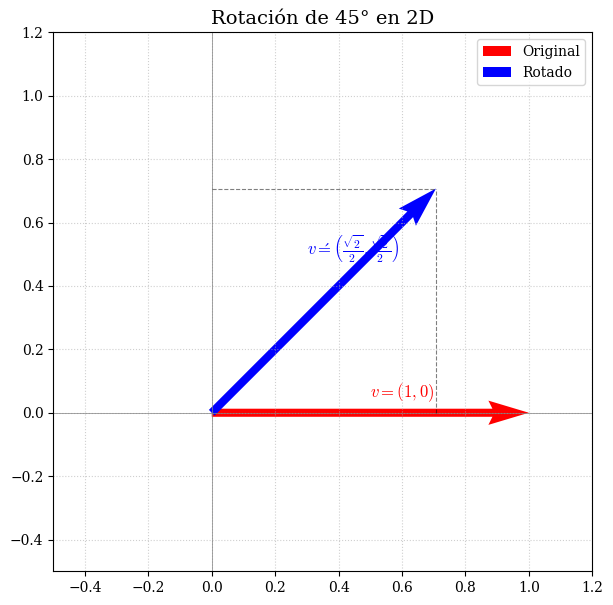

In [ ]:
from IPython.display import display, Math, Latex
# ----------------------------------------------
# Paso 6: ver la gráfiquini
# ----------------------------------------------
plt.figure(figsize=(7, 7))
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)

# Vectores
plt.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='red', width=0.015, label='Original')
plt.quiver(0, 0, 0.7071, 0.7071, angles='xy', scale_units='xy', scale=1, color='blue', width=0.015, label='Rotado')

# Líneas de componentes
plt.plot([0.7071, 0.7071], [0, 0.7071], 'k--', lw=0.8, alpha=0.5)
plt.plot([0, 0.7071], [0.7071, 0.7071], 'k--', lw=0.8, alpha=0.5)

# Añadir etiquetas
plt.text(0.5, 0.05, r'$v = (1, 0)$', color='red', fontsize=12)
plt.text(0.3, 0.5, r'$v\' = \left(\frac{\sqrt{2}}{2}, \frac{\sqrt{2}}{2}\right)$', color='blue', fontsize=12)

# Configuración final
plt.title("Rotación de 45° en 2D", fontsize=14)
plt.xlim(-0.5, 1.2)
plt.ylim(-0.5, 1.2)
plt.grid(linestyle='dotted', alpha=0.6)
plt.legend(loc='upper right')
plt.gca().set_aspect('equal')
plt.show()

In [ ]:
import numpy as np

def rotacion_2D(vector, angulo):
    """
    Rota un vector bidimensional por un ángulo dado.

    Parámetros:
    -----------
    vector : numpy.ndarray
        Vector bidimensional (x, y).
    angulo : float
        Ángulo de rotación en grados.

    Retorna:
    --------
    numpy.ndarray
        Vector rotado.
    """
    theta = np.radians(angulo)  # Convertir grados a radianes
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])  # Matriz de rotación

    return np.dot(R, vector)  # Aplicar transformación

# Ejemplo de uso
v = np.array([1, 0])  # Vector inicial en el eje X
angulo = 45  # Rotación de 45 grados

v_rotado = rotacion_2D(v, angulo)
print("Vector original:", v)
print(f"Vector rotado {angulo}°:", v_rotado)


Vector original: [1 0]
Vector rotado 45°: [0.70710678 0.70710678]


#**Ejercicio 1.8**

In [ ]:
import numpy as np

def rotacion_3D(vector, angulo, tipo):
    """
    Realiza una rotación 3D de un vector alrededor de un eje específico.

    Parámetros:
    vector (np.array): Vector en el espacio 3D a rotar.
    angulo (float): Ángulo de rotación en grados.
    tipo (str): Eje de rotación ("x", "y" o "z").

    Retorna:
    np.array: Vector rotado.
    """
    theta = np.radians(angulo)  # Convertir grados a radianes

    if tipo == "z":
        R = np.array([[np.cos(theta), -np.sin(theta), 0],
                      [np.sin(theta), np.cos(theta), 0],
                      [0, 0, 1]])  # Matriz de rotación en Z
    elif tipo == "y":
        R = np.array([[np.cos(theta), 0, np.sin(theta)],
                      [0, 1, 0],
                      [-np.sin(theta), 0, np.cos(theta)]])  # Matriz de rotación en Y
    elif tipo == "x":
        R = np.array([[1, 0, 0],
                      [0, np.cos(theta), -np.sin(theta)],
                      [0, np.sin(theta), np.cos(theta)]])  # Matriz de rotación en X

    return np.dot(R, vector)  # Aplicar la rotación al vector


# Ejemplo de uso
v = np.array([1, 0, 0])  # Vector inicial en el eje X
angulo = 45  # Rotación de 45 grados
eje = "z"  # Eje de rotación

v_rotado = rotacion_3D(v, angulo, eje)
print("Vector original:", v)
print(f"Vector rotado {angulo}° alrededor del eje {eje}:", v_rotado)

Vector original: [1 0 0]
Vector rotado 45° alrededor del eje z: [0.70710678 0.70710678 0.        ]


# **Ejercicio 1.9**

In [ ]:
def norma1(matriz):
    """
    Calcula la norma 1 de una matriz.

    La norma 1 de una matriz es el máximo de las sumas absolutas de sus columnas.

    Parámetros:
    matriz (list of list): Matriz de entrada.

    Retorna:
    float: Valor de la norma 1.
    """
    m = len(matriz)
    n = len(matriz[0])
    c = np.zeros_like(matriz[0])

    for j in range(n):
        for i in range(m):
            c[j] += abs(matriz[i][j])

    return max(c)


# Ejemplo de uso
A = [[2, 3, -4],
     [0, -4, 2]]

print("La norma 1 de la matriz A:\n", A)
print("Es:", norma1(A))

La norma 1 de la matriz A:
 [[2, 3, -4], [0, -4, 2]]
Es: 7


# **EJERCICIO 1.10**

In [ ]:
def norma_infinito(matriz):
    return max(sum(abs(matriz[i][j]) for j in range(len(matriz[0]))) for i in range(len(matriz)))

# Ejemplo de uso
A = [[3, -2, 5], [1, -4, 2], [-2, 3, -1]]
print("Norma infinito de A:", norma_infinito(A))

Norma infinito de A: 10


# **Ejercicio 1.11**

In [ ]:
import numpy as np

# Función para calcular la norma 2 de una matriz según la fórmula dada
def norma_2(A):
    return np.sqrt(np.sum(A**2, axis=1))

# Ejemplo de uso
A = np.array([[3, -2, 5], [1, -4, 2], [-2, 3, -1]])
resultado = norma_2(A)
print("Norma 2 de A por filas:", resultado)

Norma 2 de A por filas: [6.164414   4.58257569 3.74165739]


# **Ejercicio 2.1**

In [ ]:
import numpy as np

def SubMat(Mat, ren, col):
    """
    Obtiene una submatriz eliminando un renglón y una columna específicos.

    Parámetros:
    Mat (np.array): Matriz original.
    ren (int): Índice del renglón a eliminar.
    col (int): Índice de la columna a eliminar.

    Retorna:
    np.array: Submatriz resultante.
    """
    M1 = np.copy(Mat)
    M1 = np.delete(M1, ren, axis=0)
    M1 = np.delete(M1, col, axis=1)
    return M1


def det(matriz):
    """
    Calcula el determinante de una matriz cuadrada de manera recursiva.

    Parámetros:
    matriz (np.array): Matriz cuadrada.

    Retorna:
    float: Determinante de la matriz.
    """
    # Caso base: matriz 2x2
    if matriz.shape[0] == 2 and matriz.shape[1] == 2:
        return matriz[0][0] * matriz[1][1] - (matriz[0][1] * matriz[1][0])

    else:
        deter = 0.0
        for col in range(matriz.shape[0]):
            deter += ((-1) ** col) * matriz[0][col] * det(SubMat(matriz, 0, col))
        return deter


def cramer(matriz, b):
    """
    Resuelve un sistema de ecuaciones lineales usando el método de Cramer.

    Parámetros:
    matriz (np.array): Matriz de coeficientes.
    b (np.array): Vector de términos independientes.

    Retorna:
    np.array: Vector solución.
    """
    det_A = det(matriz)

    if det_A == 0 or (matriz.shape[0] != len(matriz)):
        return "No se puede resolver con Crammer, el determinante de la matriz es 0 o la matriz no es cuadrada"
    else:
        x = np.zeros_like(b)
        for j in range(matriz.shape[0]):
            aux = np.copy(matriz)
            aux[:, j] = b
            x[j] = det(aux) / det_A
        return x


# Ejemplo de uso
A = np.array([[1, 1, 1],
              [1, -1, 2],
              [3, 1, -1]])
b = [15, 10, 25]


#Calculamos con inversa y paquetería
from numpy import linalg as LA

def Transpuesta(Mat):
    """
    Calcula la transpuesta de una matriz.

    Parámetros:
    Mat (np.array): Matriz de entrada.

    Retorna:
    np.array: Matriz transpuesta.
    """
    return np.transpose(Mat)


def Cofactores(Mat):
    """
    Calcula la matriz de cofactores de una matriz cuadrada.

    Parámetros:
    Mat (np.array): Matriz cuadrada.

    Retorna:
    np.array: Matriz de cofactores.
    """
    Cofa = np.zeros_like(Mat, dtype=float)
    for ren in range(Mat.shape[0]):
        for col in range(Mat.shape[1]):
            Cofa[ren, col] = ((-1) ** (ren + col)) * det(SubMat(Mat, ren, col))
    return Cofa


def Inv(Mat):
    """
    Calcula la inversa de una matriz cuadrada.

    Parámetros:
    Mat (np.array): Matriz cuadrada.

    Retorna:
    np.array: Matriz inversa.

    Lanza:
    ValueError: Si la matriz es singular (determinante = 0).
    """
    deter = det(Mat)
    if deter == 0:
        raise ValueError("La matriz es singular y no tiene inversa.")
    Cofac = Cofactores(Mat)
    Cofac = Transpuesta(Cofac)
    Inversa = (1 / deter) * Cofac
    return Inversa


def SolveInv(Mat, vec):
    """
    Resuelve un sistema de ecuaciones lineales usando la inversa de la matriz.

    Parámetros:
    Mat (np.array): Matriz de coeficientes.
    vec (np.array): Vector de términos independientes.

    Retorna:
    np.array: Vector solución.
    """
    InvMat = Inv(Mat)
    Solucion = InvMat @ vec
    return Solucion


# Ejemplo de uso
A = np.array([[1, 1, 1],
              [1, -1, 2],
              [3, 1, -1]])
b = [15, 10, 25]

print("Solución usando inversa:", SolveInv(A, b))
print("Solución usando paquetería:", LA.solve(A, b))

print("El vector solución 'x' del sistema es:", cramer(A, b))

Solución usando inversa: [8. 4. 3.]
Solución usando paquetería: [8. 4. 3.]
El vector solución 'x' del sistema es: [8 4 3]


In [ ]:
#Ejemplo2
A = np.array([[1,1,1],
              [1,-1,2],
              [3,1,-1]])
bp = [10,15,25]

print("\nEl vector solución 'x' del sistema2  es: ",cramer(A,bp))
print("solucion inversa:",SolveInv(A,bp))
print("solucion paqueteria:",LA.solve(A,bp))



El vector solución 'x' del sistema2  es:  [ 9 -1  2]
solucion inversa: [ 9.5 -1.5  2. ]
solucion paqueteria: [ 9.5 -1.5  2. ]



# **Ejercicio 2.2**

**VERSION 1**

Tamaño de la matriz: 10x10
Tiempo Determinante: 0.000112 s
Tiempo Inversa: 0.000078 s
Tiempo Sustitución Atrás: 0.000065 s
Tiempo Sustitución Adelante: 0.000036 s
Tiempo Solver Diagonal: 0.000027 s
Tiempo Algoritmo de Thomas: 0.000046 s
Mejor tiempo: Solver Diagonal

Tamaño de la matriz: 20x20
Tiempo Determinante: 0.000050 s
Tiempo Inversa: 0.000062 s
Tiempo Sustitución Atrás: 0.000081 s
Tiempo Sustitución Adelante: 0.000071 s
Tiempo Solver Diagonal: 0.000018 s
Tiempo Algoritmo de Thomas: 0.000077 s
Mejor tiempo: Solver Diagonal

Tamaño de la matriz: 30x30
Tiempo Determinante: 0.000048 s
Tiempo Inversa: 0.000078 s
Tiempo Sustitución Atrás: 0.000107 s
Tiempo Sustitución Adelante: 0.000103 s
Tiempo Solver Diagonal: 0.000015 s
Tiempo Algoritmo de Thomas: 0.000090 s
Mejor tiempo: Solver Diagonal

Tamaño de la matriz: 40x40
Tiempo Determinante: 0.000056 s
Tiempo Inversa: 0.000091 s
Tiempo Sustitución Atrás: 0.000149 s
Tiempo Sustitución Adelante: 0.000119 s
Tiempo Solver Diagonal: 0.000016 

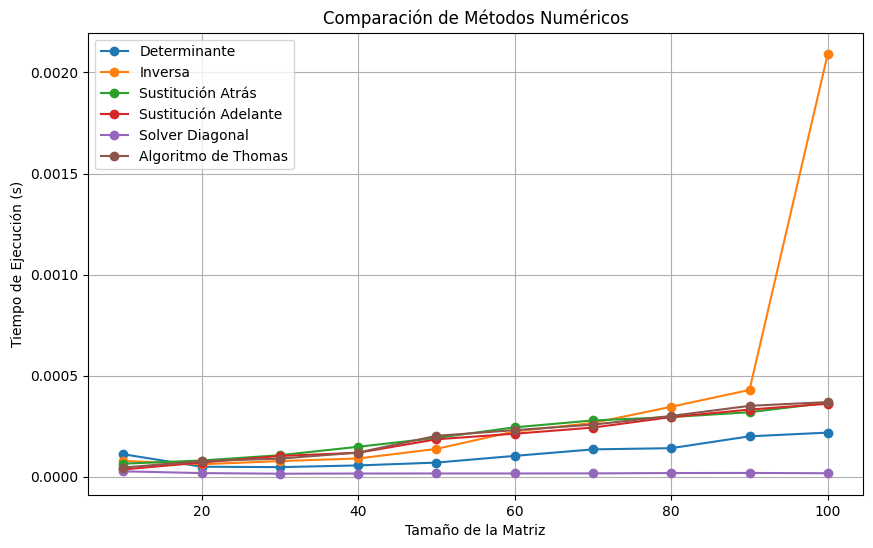

In [ ]:
import numpy as np
from numpy import linalg as LA
from scipy.linalg import lu
import matplotlib.pyplot as plt
import time

def crear_matriz_tribanda(n):
    DP = 2 * np.ones(n)
    DS = -1 * np.ones(n-1)
    DI = -1 * np.ones(n-1)
    return np.diag(DP) + np.diag(DS, k=1) + np.diag(DI, k=-1), DP, DS, DI

def determinante(A):
    return LA.det(A)

def inversa(A):
    return LA.inv(A)

def sustitucion_atras(U, b):
    n = len(b)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    return x

def sustitucion_adelante(L, b):
    n = len(b)
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - np.dot(L[i, :i], x[:i])) / L[i, i]
    return x

def solver_diagonal(D, b):
    return b / np.diag(D)

def Thomas(DP, DS, DI, b):
    n = len(DP)
    x = np.zeros(n)
    DP, DS, DI, b = DP.copy(), DS.copy(), DI.copy(), b.copy()

    for i in range(1, n):
        factor = DI[i-1] / DP[i-1]
        DP[i] -= factor * DS[i-1]
        b[i] -= factor * b[i-1]

    x[-1] = b[-1] / DP[-1]
    for i in range(n-2, -1, -1):
        x[i] = (b[i] - DS[i] * x[i+1]) / DP[i]

    return x

tamanos = list(range(10, 110, 10))
tiempos = {"Determinante": [], "Inversa": [], "Sustitución Atrás": [], "Sustitución Adelante": [], "Solver Diagonal": [], "Algoritmo de Thomas": []}

for n in tamanos:
    A, DP, DS, DI = crear_matriz_tribanda(n)
    b = np.ones(n)
    D = np.diag(DP)
    P, L, U = lu(A)

    inicio = time.time()
    determinante(A)
    tiempos["Determinante"].append(time.time() - inicio)

    inicio = time.time()
    inversa(A)
    tiempos["Inversa"].append(time.time() - inicio)

    inicio = time.time()
    sustitucion_atras(U, b)
    tiempos["Sustitución Atrás"].append(time.time() - inicio)

    inicio = time.time()
    sustitucion_adelante(L, b)
    tiempos["Sustitución Adelante"].append(time.time() - inicio)

    inicio = time.time()
    solver_diagonal(D, b)
    tiempos["Solver Diagonal"].append(time.time() - inicio)

    inicio = time.time()
    Thomas(DP, DS, DI, b)
    tiempos["Algoritmo de Thomas"].append(time.time() - inicio)

    mejor_metodo = min(tiempos, key=lambda metodo: tiempos[metodo][-1])
    print(f"Tamaño de la matriz: {n}x{n}")
    for metodo, valores in tiempos.items():
        print(f"Tiempo {metodo}: {valores[-1]:.6f} s")
    print(f"Mejor tiempo: {mejor_metodo}\n")

plt.figure(figsize=(10,6))
for metodo, valores in tiempos.items():
    plt.plot(tamanos, valores, label=metodo, marker='o')
plt.xlabel("Tamaño de la Matriz")
plt.ylabel("Tiempo de Ejecución (s)")
plt.title("Comparación de Métodos Numéricos")
plt.legend()
plt.grid()
plt.show()


**VERSION 2**

In [ ]:
import numpy as np
from numpy import linalg as LA
from scipy.linalg import lu
import matplotlib.pyplot as plt
import time

# Función para crear matrices tridiagonales
def crear_matriz_tribanda(n):
    DP = 2 * np.ones(n)
    DS = -1 * np.ones(n-1)
    DI = -1 * np.ones(n-1)
    return np.diag(DP) + np.diag(DS, k=1) + np.diag(DI, k=-1), DP, DS, DI

# Funciones matemáticas
def determinante(A):
    return LA.det(A)

def inversa(A):
    return LA.inv(A)

def sustitucion_atras(U, b):
    n = len(b)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    return x

def sustitucion_adelante(L, b):
    n = len(b)
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - np.dot(L[i, :i], x[:i])) / L[i, i]
    return x

def solver_diagonal(D, b):
    return b / np.diag(D)

def Thomas(DP, DS, DI, b):
    n = len(DP)
    x = np.zeros(n)
    DP, DS, DI, b = DP.copy(), DS.copy(), DI.copy(), b.copy()

    for i in range(1, n):
        factor = DI[i-1] / DP[i-1]
        DP[i] -= factor * DS[i-1]
        b[i] -= factor * b[i-1]

    x[-1] = b[-1] / DP[-1]
    for i in range(n-2, -1, -1):
        x[i] = (b[i] - DS[i] * x[i+1]) / DP[i]

    return x


In [ ]:
# Lista de tamaños de matriz a probar
tamanos = list(range(10, 110, 10))

# Diccionario para guardar los tiempos
tiempos = {
    "Determinante": [],
    "Inversa": [],
    "Sustitución Atrás": [],
    "Sustitución Adelante": [],
    "Solver Diagonal": [],
    "Algoritmo de Thomas": []
}

# Medir tiempos para cada tamaño de matriz
for n in tamanos:
    A, DP, DS, DI = crear_matriz_tribanda(n)
    b = np.ones(n)
    D = np.diag(DP)
    P, L, U = lu(A)

    # Medir tiempo de determinante
    inicio = time.time()
    determinante(A)
    tiempos["Determinante"].append(time.time() - inicio)

    # Medir tiempo de inversa
    inicio = time.time()
    inversa(A)
    tiempos["Inversa"].append(time.time() - inicio)

    # Medir tiempo de sustitución atrás
    inicio = time.time()
    sustitucion_atras(U, b)
    tiempos["Sustitución Atrás"].append(time.time() - inicio)

    # Medir tiempo de sustitución adelante
    inicio = time.time()
    sustitucion_adelante(L, b)
    tiempos["Sustitución Adelante"].append(time.time() - inicio)

    # Medir tiempo del solver diagonal
    inicio = time.time()
    solver_diagonal(D, b)
    tiempos["Solver Diagonal"].append(time.time() - inicio)

    # Medir tiempo del algoritmo de Thomas
    inicio = time.time()
    Thomas(DP, DS, DI, b)
    tiempos["Algoritmo de Thomas"].append(time.time() - inicio)

# Mostrar resultados de tiempos
for metodo, valores in tiempos.items():
    print(f"Tiempos para {metodo}: {valores}")


Tiempos para Determinante: [0.0001049041748046875, 5.340576171875e-05, 5.364418029785156e-05, 6.389617919921875e-05, 8.511543273925781e-05, 0.00010657310485839844, 0.0001251697540283203, 0.0001418590545654297, 0.00017023086547851562, 0.00022530555725097656]
Tiempos para Inversa: [9.107589721679688e-05, 6.699562072753906e-05, 8.726119995117188e-05, 0.00010371208190917969, 0.00015974044799804688, 0.00021529197692871094, 0.0002949237823486328, 0.0003490447998046875, 0.00046324729919433594, 0.000453948974609375]
Tiempos para Sustitución Atrás: [7.557868957519531e-05, 8.606910705566406e-05, 0.00011515617370605469, 0.00014591217041015625, 0.00018644332885742188, 0.0002536773681640625, 0.00025582313537597656, 0.00029969215393066406, 0.0003371238708496094, 0.00035119056701660156]
Tiempos para Sustitución Adelante: [4.553794860839844e-05, 7.224082946777344e-05, 0.00013518333435058594, 0.00013709068298339844, 0.00019311904907226562, 0.0002129077911376953, 0.0002579689025878906, 0.000268697738647

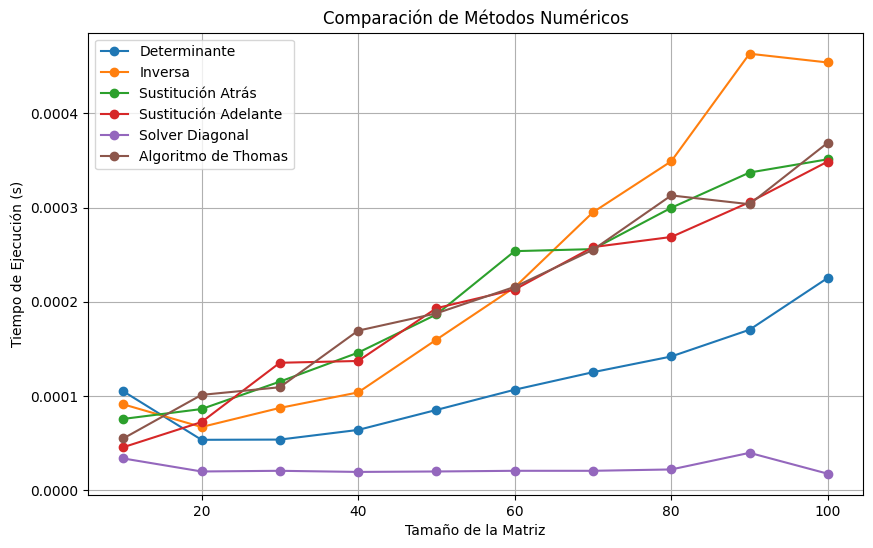

In [ ]:
# Configurar la figura
plt.figure(figsize=(10,6))

# Graficar cada método con su respectiva curva de tiempo
for metodo, valores in tiempos.items():
    plt.plot(tamanos, valores, label=metodo, marker='o')

# Etiquetas y leyenda
plt.xlabel("Tamaño de la Matriz")
plt.ylabel("Tiempo de Ejecución (s)")
plt.title("Comparación de Métodos Numéricos")
plt.legend()
plt.grid()
plt.show()


# **3.0**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.linalg import lu

# Función manual para calcular el determinante usando eliminación de Gauss
def SubMat(Mat, ren, col):
    """
    Calcula el determinante de una matriz cuadrada usando eliminación de Gauss.
    """
   # Crear una copia de la matriz original para no modificarla
    M1 = np.copy(Mat)

    # Eliminar el renglón especificado
    M1 = np.delete(M1, ren, axis=0)

    # Eliminar la columna especificada
    M1 = np.delete(M1, col, axis=1)

    return M1

def Det(Mat):

    # Caso base: matriz 2x2
    if Mat.shape[0] == 2 and Mat.shape[1] == 2:
        return Mat[0][0] * Mat[1][1] - (Mat[0][1] * Mat[1][0])

    # Caso recursivo: matrices más grandes
    deter = 0.0
    for col in range(Mat.shape[0]):
        # Calcula el cofactor y suma al determinante
        deter += ((-1) ** col) * Mat[0][col] * Det(SubMat(Mat, 0, col))
    return deter

####solvinv


def Transpuesta(Mat):

    for ren in range(Mat.shape[0]):
        for col in range(Mat.shape[1]):
            if ren < col:
                # Intercambia los elementos para obtener la transpuesta
                Mat[ren, col], Mat[col, ren] = Mat[col, ren], Mat[ren, col]
    return Mat



def Cofactores(Mat):

    # Crear una matriz de ceros del mismo tamaño que Mat para almacenar los cofactores
    Cofa = np.zeros_like(Mat, dtype=float)

    # Calcular el cofactor para cada elemento de la matriz
    for ren in range(Mat.shape[0]):
        for col in range(Mat.shape[1]):
            # Calcular el determinante de la submatriz (menor) y aplicar el signo
            Cofa[ren, col] = ((-1) ** (ren + col)) * Det(SubMat(Mat, ren, col))
    return Cofa


def Inv(Mat):

    # Calcular el determinante de la matriz
    deter = Det(Mat)

    # Verificar si la matriz es singular (determinante = 0)
    if deter == 0:
        raise ValueError("La matriz es singular y no tiene inversa.")

    # Calcular la matriz de cofactores
    Cofac = Cofactores(Mat)

    # Transponer la matriz de cofactores para obtener la matriz adjunta
    Cofac = Transpuesta(Cofac)

    # Calcular la inversa multiplicando la adjunta por 1/determinante
    Inversa = (1 / deter) * Cofac

    return Inversa



def SolveInv(Mat, vec):

    # Calcular la inversa de la matriz
    InvMat = Inv(Mat)

    # Multiplicar la inversa por el vector de términos independientes
    Solucion = InvMat @ vec

    return Solucion




####SUSTITUCION ATRAS


def SustitucionAtras(Mat, b):

    n = Mat.shape[0]
    x = np.zeros(n)

    for i in range(n-1, -1, -1):
        SumCum = 0.0
        for j in range(i+1, n):
            SumCum += Mat[i, j] * x[j]
        x[i] = (b[i] - SumCum) / Mat[i, i]

    return x
####SUSTITUCION DELANTE



def SustitucionDelante(Mat, b):

    n = Mat.shape[0]
    x = np.zeros(n)

    for i in range(n):
        SumCum = 0.0
        for j in range(i):
            SumCum += Mat[i, j] * x[j]
        x[i] = (b[i] - SumCum) / Mat[i, i]

    return x


###SOLVER DIAGONAL


def SolverDiagonal(A, b):

    n = len(A)
    x = np.zeros_like(A, dtype=float)  # Asegura que x sea de tipo flotante
    for i in range(n):
        x[i] = b[i] / A[i]
    return x



###THOMAS
def Thomas(DP,DS,DI,b):
  n=len(DP)
  x=np.zeros(n)

  for i in range(1,n):
    DP[i]=DP[i]-(DI[i-1]/DP[i-1])*DS[i-1]


  x[-1]=b[-1]/DP[-1]

  for i in range(n-2,-1,-1):
    x[i]=(b[i]-DS[i]*x[i+1])/DP[i]
  return x


# Medición de tiempos
def medir_tiempos():
    tamanos = list(range(3, 11))
    tiempos = {"Determinante": [], "Inversa": [], "Sustitución Atrás": [],
               "Sustitución Adelante": [], "Solver Diagonal": [], "Algoritmo de Thomas": []}

    for n in tamanos:
        A = np.array([[j + i*n for j in range(1, n+1)] for i in range(n)], dtype=float)
        b = np.array([i+1 for i in range(n)], dtype=float)
        D = np.diag([i+1 for i in range(n)])
        DP = 2 * np.ones(n)
        DS = -1 * np.ones(n-1)
        DI = -1 * np.ones(n-1)
        P, L, U = lu(A)

        for metodo, funcion in zip(tiempos.keys(), [Det, SolveInv, SustitucionAtras, SustitucionDelante, SolverDiagonal, Thomas]):
            inicio = time.time()
            if metodo == "Algoritmo de Thomas":
                funcion(DP, DS, DI, b)
            elif metodo in ["Sustitución Atrás", "Sustitución Adelante", "Solver Diagonal"]:
                funcion(A, b)
            else:
                funcion(A)
            tiempos[metodo].append(time.time() - inicio)

        mejor_metodo = min(tiempos, key=lambda metodo: tiempos[metodo][-1])
        print(f"Tamaño de la matriz: {n}x{n}")
        for metodo, valores in tiempos.items():
            print(f"Tiempo {metodo}: {valores[-1]:.6f} s")
        print(f"Mejor tiempo: {mejor_metodo}\n")

    return tamanos, tiempos

# Obtener los tiempos
tamanos, tiempos = medir_tiempos()

# Graficar los tiempos de ejecución con escala logarítmica
plt.figure(figsize=(10,6))
for metodo, valores in tiempos.items():
    plt.plot(tamanos, valores, label=metodo, marker='o', linestyle='--')
plt.xlabel("Tamaño de la Matriz")
plt.ylabel("Tiempo de Ejecución (s)")
plt.yscale("log")
plt.title("Comparación de Métodos Numéricos")
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.show()

TypeError: SolveInv() missing 1 required positional argument: 'vec'

# **Ejercicio 2.3**

In [ ]:
def SolBandas(matriz, b):
    """
    Resuelve un sistema de ecuaciones lineales con una matriz de dos bandas.

    Parámetros:
    matriz (np.array): Matriz de coeficientes.
    b (np.array): Vector de términos independientes.

    Retorna:
    np.array: Vector solución.
    """
    x = np.zeros_like(b)
    if np.any(np.diagonal(matriz, offset=1) == 0) and np.any(np.diagonal(matriz, offset=-1)) != 0:
        # Sustitución hacia adelante
        for i in range(len(matriz)):
            x[i] = (b[i] - matriz[i, i - 1] * x[i - 1]) / matriz[i, i]
    elif np.any(np.diagonal(matriz, offset=1) != 0) and np.any(np.diagonal(matriz, offset=-1)) == 0:
        # Sustitución hacia atrás
        for i in range(len(matriz) - 1, -1, -1):
            if i == len(matriz) - 1:
                x[i] = b[i] / matriz[i, i]
            else:
                x[i] = (b[i] - matriz[i, i + 1] * x[i + 1]) / matriz[i, i]
    return x


# Ejemplo de uso
A = np.array([[1, 1, 0],
              [0, -1, 3],
              [0, 0, -1]])
b = [1, 1, 1]

print("Solución del sistema de bandas:", SolBandas(A, b))

Solución del sistema de bandas: [ 5 -4 -1]


# **Ejercicio 2.4**

In [ ]:
import numpy as np

def Thomas_adelante(DP, DS, DI, b):
    """
    Algoritmo de Thomas modificado con sustitución hacia adelante.
    DP: Diagonal principal
    DS: Diagonal superior
    DI: Diagonal inferior
    b: Vector de términos independientes
    """
    n = len(DP)
    x = np.zeros(n)
    DP, DS, DI, b = DP.copy(), DS.copy(), DI.copy(), b.copy()

    # Eliminación hacia adelante
    for i in range(1, n):
        factor = DI[i-1] / DP[i-1]
        DP[i] -= factor * DS[i-1]
        b[i] -= factor * b[i-1]

    # Sustitución hacia adelante
    x[0] = b[0] / DP[0]
    for i in range(1, n):
        x[i] = (b[i] - DI[i-1] * x[i-1]) / DP[i]

    return x

# Ejemplo de uso
DP = np.array([2.0, 2.0, 2.0, 2.0])  # Diagonal principal
DS = np.array([-1.0, -1.0, -1.0])    # Diagonal superior
DI = np.array([-1.0, -1.0, -1.0])    # Diagonal inferior
b = np.array([1.0, 2.0, 3.0, 4.0])   # Vector b

solucion = Thomas_adelante(DP, DS, DI, b)
print("Solución del sistema:", solucion)

Solución del sistema: [ 0.5  2.   5.  10. ]
